<a href="https://colab.research.google.com/github/AngieDuarteA01/Ciencia-de-datos-/blob/main/Variabilidad_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargar dato desde google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install statsmodels
!pip install wquantiles

In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CIENCIA DE DATOS /marriage_data_india.csv")

In [ ]:
data.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [ ]:
data.tail()


,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
9995,9996,Love,25,Male,Postgraduate,Different,Hindu,Yes,Urban,Not Disclosed,Medium,No,5,Low,38,Yes,No,No
9996,9997,Arranged,31,Female,School,Same,Hindu,Partial,Rural,No,High,No,4,Low,1,No,No,No
9997,9998,Love,22,Male,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,2,Low,24,No,Yes,No
9998,9999,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Urban,No,Medium,No,3,Middle,28,No,No,No
9999,10000,Arranged,36,Male,School,Different,Hindu,Partial,Urban,Yes,High,No,3,Middle,7,Yes,No,Yes


In [ ]:
data.sample(3)

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
604,605,Love,32,Male,School,Different,Hindu,Yes,Rural,Yes,Medium,No,5,High,28,Yes,Yes,No
6689,6690,Love,20,Female,PhD,Same,Muslim,Yes,Urban,No,High,No,4,Low,5,Yes,No,No
2856,2857,Arranged,28,Male,School,Different,Hindu,No,Urban,Yes,High,No,3,Low,9,No,No,No


In [ ]:
data.columns

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Marriage_Type         10000 non-null  object
 2   Age_at_Marriage       10000 non-null  int64 
 3   Gender                10000 non-null  object
 4   Education_Level       10000 non-null  object
 5   Caste_Match           10000 non-null  object
 6   Religion              10000 non-null  object
 7   Parental_Approval     10000 non-null  object
 8   Urban_Rural           10000 non-null  object
 9   Dowry_Exchanged       10000 non-null  object
 10  Marital_Satisfaction  10000 non-null  object
 11  Divorce_Status        10000 non-null  object
 12  Children_Count        10000 non-null  int64 
 13  Income_Level          10000 non-null  object
 14  Years_Since_Marriage  10000 non-null  int64 
 15  Spouse_Working        10000 non-null 

In [ ]:
data.describe()

,ID,Age_at_Marriage,Children_Count,Years_Since_Marriage
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,28.503800,2.508800,24.973800
std,2886.89568,6.279564,1.695467,14.054838
min,1.00000,18.000000,0.000000,1.000000
25%,2500.75000,23.000000,1.000000,13.000000
50%,5000.50000,29.000000,3.000000,25.000000
75%,7500.25000,34.000000,4.000000,37.000000
max,10000.00000,39.000000,5.000000,49.000000


In [ ]:
#Generar cálculos de desviación estándar y cuantiles
data["Age_at_Marriage"].std()

6.279564384006597

In [ ]:
Age_at_Marriage= data.groupby("Age_at_Marriage").max()

In [ ]:
Age_at_Marriage

In [ ]:
#Calcular el IQR
data.Age_at_Marriage.quantile(0.75) - data.Age_at_Marriage.quantile(0.25)

np.float64(11.0)

In [ ]:
robust.scale.mad(data.Age_at_Marriage)

np.float64(7.41301109252801)

In [ ]:
data["Age_at_Marriage"].quantile([0.25, 0.75])

,Age_at_Marriage
0.25,23.0
0.75,34.0


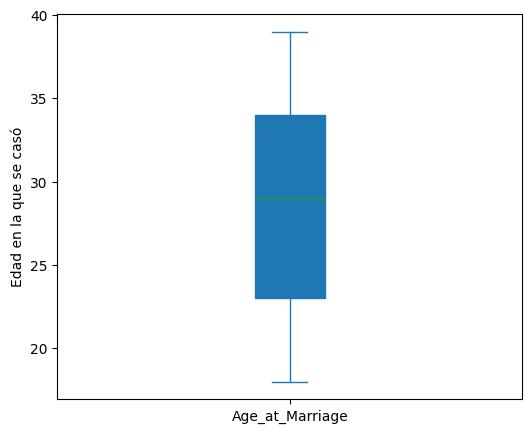

In [ ]:
#Dibujando un boxplot
ax = (data.Age_at_Marriage).plot.box(figsize=(6,5),patch_artist=True)
ax.set_ylabel("Edad en la que se casan")
ax = ax.set_ylabel("Edad en la que se casó")
#Distribucion de los datos

In [ ]:
#calculando tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Age_at_Marriage"],10)
binnedPopulation.value_counts()

,count
Age_at_Marriage,
"(17.979, 20.1]",1352
"(36.9, 39.0]",1314
"(26.4, 28.5]",950
"(28.5, 30.6]",949
"(30.6, 32.7]",943
"(20.1, 22.2]",914
"(32.7, 34.8]",911
"(24.3, 26.4]",909
"(34.8, 36.9]",908


Text(0, 0.5, '# de personas que se casan a x edad')

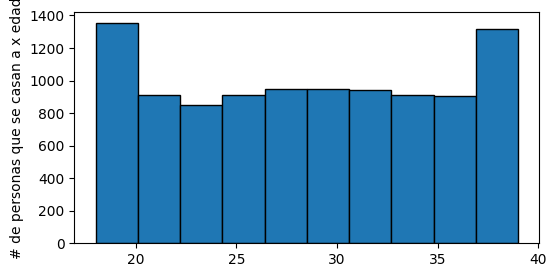

In [ ]:
ax=(data["Age_at_Marriage"]).plot.hist(figsize=(6,3),edgecolor='k')
ax.set_ylabel("# de personas que se casan a x edad")
#Segun la edad cuantas personas se casan de las 100.000 que se entrevistaron

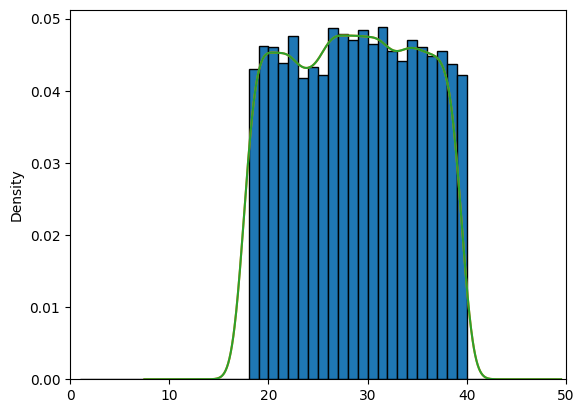

In [62]:
#Diagrama de dispersión y curva de densidad
ax = data["Age_at_Marriage"].plot.hist(density = True, xlim=[0,50], bins = range(1,50),edgecolor='k')
data["Age_at_Marriage"].plot.density(ax=ax)
data ["Age_at_Marriage"].plot.density(ax=ax)
ax.set_label("Tasa de edad matrimonial")
#Esta grafica nos muestra que el mayor numero de datos esta de 18 a 40 añoss

#Preguntas de clase
a). Qué significa que la desviación estándar es casi dos veces mayor que la MAD?
Esto indica que los datos tienen una dispersión significativa y que existen valores atípicos (outliers) o una distribución con colas pesadas.
b). Cómo puedo mejorar esta situación?
Hay varias opciones , una de ellas es eliminar datos y asi consolidar la información .
c). Explique el resultado obtenido al calcular IQR
El IQR es una medida estadística que indica la dispersión de un conjunto de datos, este dato lo que nos indica es que el valor central es de 4847308
Sobre exploración en distribución de datos.
a) Qué información nos suministra los percentiles de tasa de homicidios por estados?
Nos muestra el rango de poblacion en los estados y se leen de la siguiente manera : 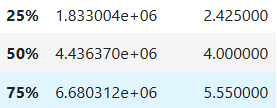
Si una ciudad esta en el percentil 25 significa que el 75% de los datos tiene una poblacion superior de 1.833004 e+6

b) Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado.
Este diagrama nos muestra la dispersion de los datos , a partir del que se genero con el ejercicio podemos percibir que los datos son muy dispersos

c) Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.
Explique el resultado obtenido por el diagrama de dispersión